In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime

# Assuming G10 currency pairs
currency_pairs = [
    "EUR/USD", "USD/JPY", "GBP/USD", "AUD/USD", "USD/CAD",
    "USD/CHF", "NZD/USD", "EUR/GBP", "EUR/JPY", "GBP/JPY"
]

start_date = datetime(2024, 7, 1)
end_date = datetime(2025, 7, 1)

datetime_1min = pd.date_range(start=start_date, end=end_date, freq='1min')
datetime_5min = pd.date_range(start=start_date, end=end_date, freq='5min')

def simulate_mid_prices(timestamps, seed=42):
    np.random.seed(seed)
    prices = {}
    for pair in currency_pairs:
        base_price = np.random.uniform(0.5, 1.5)
        noise = np.random.normal(0, 0.0005, len(timestamps))
        returns = np.cumsum(noise)
        mid_prices = base_price * np.exp(returns)
        prices[pair] = mid_prices
    df = pd.DataFrame(prices, index=timestamps)
    df.index.name = "timestamp"
    return df

data_1min = simulate_mid_prices(datetime_1min, seed=42)
data_5min = simulate_mid_prices(datetime_5min, seed=100)

In [ ]:
data_1min.to_csv("simulated_forex_1min.csv")
data_5min.to_csv("simulated_forex_5min.csv")

In [ ]:
data_1min.head()

,EUR/USD,USD/JPY,GBP/USD,AUD/USD,USD/CAD,USD/CHF,NZD/USD,EUR/GBP,EUR/JPY,GBP/JPY
timestamp,,,,,,,,,,
2024-07-01 00:00:00,0.874054,0.613555,1.319976,0.641486,0.667857,0.677937,1.154106,1.216545,1.043235,0.958054
2024-07-01 00:01:00,0.874193,0.613402,1.320452,0.641447,0.667988,0.677727,1.154658,1.217017,1.042991,0.958850
2024-07-01 00:02:00,0.874315,0.613309,1.320033,0.641000,0.668231,0.677221,1.154693,1.216142,1.042954,0.959369
2024-07-01 00:03:00,0.874757,0.613295,1.320968,0.641017,0.667927,0.677505,1.155567,1.217344,1.043270,0.958973
2024-07-01 00:04:00,0.874503,0.613111,1.319451,0.641176,0.667826,0.677558,1.155468,1.217476,1.043352,0.958938


In [ ]:
data_5min.head()

,EUR/USD,USD/JPY,GBP/USD,AUD/USD,USD/CAD,USD/CHF,NZD/USD,EUR/GBP,EUR/JPY,GBP/JPY
timestamp,,,,,,,,,,
2024-07-01 00:00:00,1.043112,0.795631,0.690982,1.138995,0.844903,1.072692,0.671510,0.939139,1.471174,0.543888
2024-07-01 00:05:00,1.042252,0.795276,0.690636,1.139005,0.844431,1.072754,0.671281,0.939371,1.470703,0.543790
2024-07-01 00:10:00,1.042437,0.795673,0.690382,1.139201,0.844151,1.073032,0.670915,0.939252,1.471063,0.543721
2024-07-01 00:15:00,1.042027,0.796048,0.690106,1.138176,0.844327,1.072473,0.670107,0.939057,1.470751,0.543619
2024-07-01 00:20:00,1.041907,0.796412,0.690204,1.137500,0.844919,1.072424,0.670362,0.939241,1.471329,0.543772


In [ ]:
# Historical Volatility -- rolling window 60 for 1 hour for 1min data
log_returns_1min = np.log(data_1min / data_1min.shift(1))
historical_volatility_1min = log_returns_1min.rolling(window=60).std()

# Historical Volatility -- rolling window 12 for 1 hour for 5min data
log_returns_5min = np.log(data_5min / data_5min.shift(1))
historical_volatility_5min = log_returns_5min.rolling(window=12).std()

In [ ]:
# EWMA Volatility 1min -- lambda assumed to be 0.94
lambda_param = 0.94
span = 2 / (1 - lambda_param) - 1
ewma_volatility_1min = log_returns_1min.ewm(span=span, adjust=False).std()
ewma_volatility_1min

,EUR/USD,USD/JPY,GBP/USD,AUD/USD,USD/CAD,USD/CHF,NZD/USD,EUR/GBP,EUR/JPY,GBP/JPY
timestamp,,,,,,,,,,
2024-07-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-07-01 00:01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-07-01 00:02:00,0.000014,0.000069,0.000479,0.000451,0.000120,0.000309,0.000316,0.000784,0.000140,0.000204
2024-07-01 00:03:00,0.000179,0.000123,0.000393,0.000325,0.000350,0.000446,0.000273,0.000651,0.000288,0.000648
2024-07-01 00:04:00,0.000250,0.000105,0.000722,0.000303,0.000317,0.000397,0.000328,0.000542,0.000262,0.000626
...,...,...,...,...,...,...,...,...,...,...
2025-06-30 23:56:00,0.000615,0.000467,0.000549,0.000576,0.000616,0.000525,0.000517,0.000653,0.000447,0.000509
2025-06-30 23:57:00,0.000605,0.000493,0.000561,0.000587,0.000598,0.000542,0.000505,0.000649,0.000485,0.000495
2025-06-30 23:58:00,0.000587,0.000490,0.000547,0.000579,0.000583,0.000568,0.000512,0.000643,0.000471,0.000481


In [ ]:
# EWMA Volatility 5min -- lambda assumed to be 0.94
lambda_param = 0.94
span = 2 / (1 - lambda_param) - 1
ewma_volatility_5min = log_returns_5min.ewm(span=span, adjust=False).std()
ewma_volatility_5min

,EUR/USD,USD/JPY,GBP/USD,AUD/USD,USD/CAD,USD/CHF,NZD/USD,EUR/GBP,EUR/JPY,GBP/JPY
timestamp,,,,,,,,,,
2024-07-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-07-01 00:05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-07-01 00:10:00,0.000708,0.000669,0.000095,0.000115,0.000160,0.000142,0.000144,0.000264,0.000399,0.000039
2024-07-01 00:15:00,0.000536,0.000648,0.000082,0.000480,0.000404,0.000321,0.000450,0.000290,0.000285,0.000028
2024-07-01 00:20:00,0.000514,0.000631,0.000281,0.000460,0.000615,0.000264,0.000500,0.000236,0.000373,0.000201
...,...,...,...,...,...,...,...,...,...,...
2025-06-30 23:40:00,0.000436,0.000466,0.000514,0.000538,0.000441,0.000440,0.000575,0.000519,0.000595,0.000564
2025-06-30 23:45:00,0.000425,0.000478,0.000553,0.000521,0.000436,0.000427,0.000570,0.000506,0.000592,0.000560
2025-06-30 23:50:00,0.000430,0.000479,0.000541,0.000537,0.000453,0.000436,0.000593,0.000491,0.000600,0.000543


In [ ]:
# Realized Volatility -- 1min
realized_vol_1min = np.sqrt((log_returns_1min ** 2).rolling(window=60).sum())

# Realized Volatility -- 5min
realized_vol_5min = np.sqrt((log_returns_5min ** 2).rolling(window=12).sum())

In [ ]:
# Calculation jump for 1 min data -- using 4 hour of data
rolling_window = 240
threshold_k = 3


vol_jump_flags = pd.DataFrame(index=realized_vol_1min.index, columns=realized_vol_1min.columns)

for pair in realized_vol_1min.columns:
    vol_series = realized_vol_1min[pair]
    rolling_mean = vol_series.rolling(window=rolling_window).mean()
    rolling_std = vol_series.rolling(window=rolling_window).std()
    jump_condition = vol_series > (rolling_mean + threshold_k * rolling_std)
    vol_jump_flags[pair] = jump_condition.astype(int)  # 1 if jump, 0 otherwise


Recent Volatility Jumps Detected:
                     EUR/USD  USD/JPY  GBP/USD  AUD/USD  USD/CAD  USD/CHF  \
timestamp                                                                   
2025-06-30 21:13:00      NaN      NaN      NaN      NaN      1.0      NaN   
2025-06-30 22:58:00      NaN      NaN      NaN      NaN      NaN      NaN   
2025-06-30 22:59:00      NaN      NaN      NaN      NaN      NaN      NaN   
2025-06-30 23:09:00      NaN      NaN      NaN      NaN      NaN      NaN   
2025-06-30 23:12:00      NaN      NaN      NaN      NaN      NaN      NaN   
2025-06-30 23:13:00      NaN      NaN      NaN      NaN      NaN      NaN   
2025-06-30 23:14:00      NaN      NaN      NaN      NaN      NaN      NaN   
2025-06-30 23:15:00      NaN      NaN      NaN      NaN      NaN      NaN   
2025-06-30 23:16:00      NaN      NaN      NaN      NaN      NaN      NaN   
2025-06-30 23:44:00      NaN      NaN      NaN      NaN      NaN      NaN   

                     NZD/USD  EUR/GBP  EU

In [ ]:
# Calculation jump for 5 min data
# Parameters for jump detection
rolling_window = 48
threshold_k = 3

# store jump detection flags
vol_jump_flags_5min = pd.DataFrame(index=realized_vol_5min.index, columns=realized_vol_5min.columns)

# Detect jumps for each currency pair
for pair in realized_vol_5min.columns:
    vol_series = realized_vol_5min[pair]
    rolling_mean = vol_series.rolling(window=rolling_window).mean()
    rolling_std = vol_series.rolling(window=rolling_window).std()

    # Jump condition: volatility exceeds mean + k * std
    jump_condition = vol_series > (rolling_mean + threshold_k * rolling_std)

    # Mark jumps as 1
    vol_jump_flags_5min[pair] = jump_condition.astype(int)


Recent Volatility Jumps Detected (5-Minute):
                     EUR/USD  USD/JPY  GBP/USD  AUD/USD  USD/CAD  USD/CHF  \
timestamp                                                                   
2025-06-30 00:20:00      NaN      NaN      1.0      NaN      NaN      NaN   
2025-06-30 00:25:00      NaN      NaN      1.0      NaN      NaN      NaN   
2025-06-30 06:40:00      NaN      NaN      NaN      NaN      NaN      NaN   
2025-06-30 11:15:00      NaN      NaN      NaN      NaN      NaN      NaN   
2025-06-30 12:35:00      NaN      NaN      NaN      1.0      NaN      NaN   
2025-06-30 12:40:00      NaN      NaN      NaN      1.0      NaN      NaN   
2025-06-30 16:15:00      NaN      NaN      NaN      NaN      NaN      NaN   
2025-06-30 17:55:00      NaN      NaN      NaN      NaN      NaN      NaN   
2025-06-30 18:20:00      NaN      NaN      NaN      NaN      NaN      NaN   
2025-06-30 21:10:00      NaN      1.0      NaN      NaN      NaN      NaN   

                     NZD/USD  

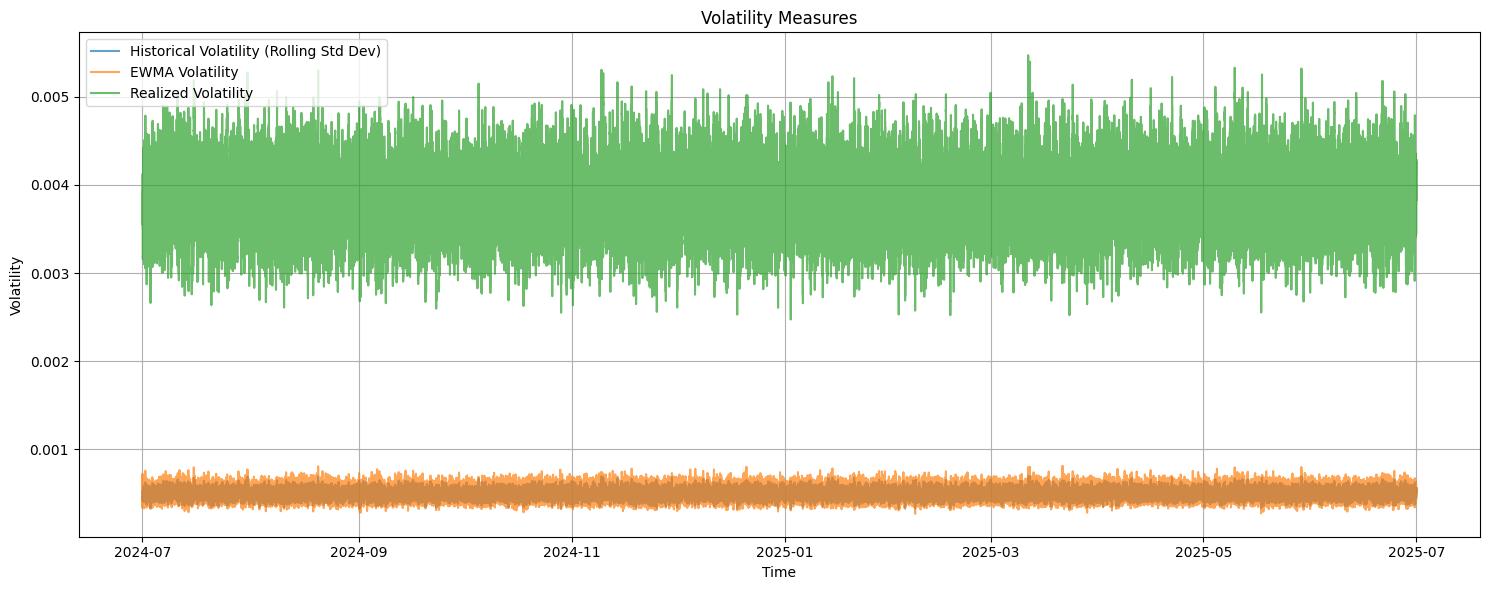

In [ ]:
# Plotting
import matplotlib.pyplot as plt

selected_pair = "GBP/USD"
historical_volatility_1min_pair = historical_volatility_1min[selected_pair]
ewma_volatility_1min_pair = ewma_volatility_1min[selected_pair]
realized_vol_1min_pair = realized_vol_1min[selected_pair]
plt.figure(figsize=(15, 6))

plt.plot(historical_volatility_1min_pair.index, historical_volatility_1min_pair, label="Historical Volatility (Rolling Std Dev)", alpha=0.7)
plt.plot(ewma_volatility_1min_pair.index, ewma_volatility_1min_pair, label="EWMA Volatility", alpha=0.7)
plt.plot(realized_vol_1min_pair.index, realized_vol_1min_pair, label="Realized Volatility", alpha=0.7)

plt.title(f"Volatility Measures")
plt.xlabel("Time")
plt.ylabel("Volatility")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
vol_jump_flags_pair = vol_jump_flags[selected_pair]
jump_dates_pair = realized_vol_1min_pair[vol_jump_flags_pair==1.0].dropna().index

In [ ]:
jump_dates_pair

DatetimeIndex(['2024-07-01 19:48:00', '2024-07-01 19:49:00',
               '2024-07-01 19:50:00', '2024-07-01 19:51:00',
               '2024-07-01 19:52:00', '2024-07-01 19:53:00',
               '2024-07-01 19:54:00', '2024-07-02 20:13:00',
               '2024-07-02 20:14:00', '2024-07-04 08:40:00',
               ...
               '2025-06-30 01:35:00', '2025-06-30 01:36:00',
               '2025-06-30 01:37:00', '2025-06-30 01:38:00',
               '2025-06-30 01:39:00', '2025-06-30 01:40:00',
               '2025-06-30 14:13:00', '2025-06-30 14:14:00',
               '2025-06-30 14:15:00', '2025-06-30 14:16:00'],
              dtype='datetime64[ns]', name='timestamp', length=2233, freq=None)

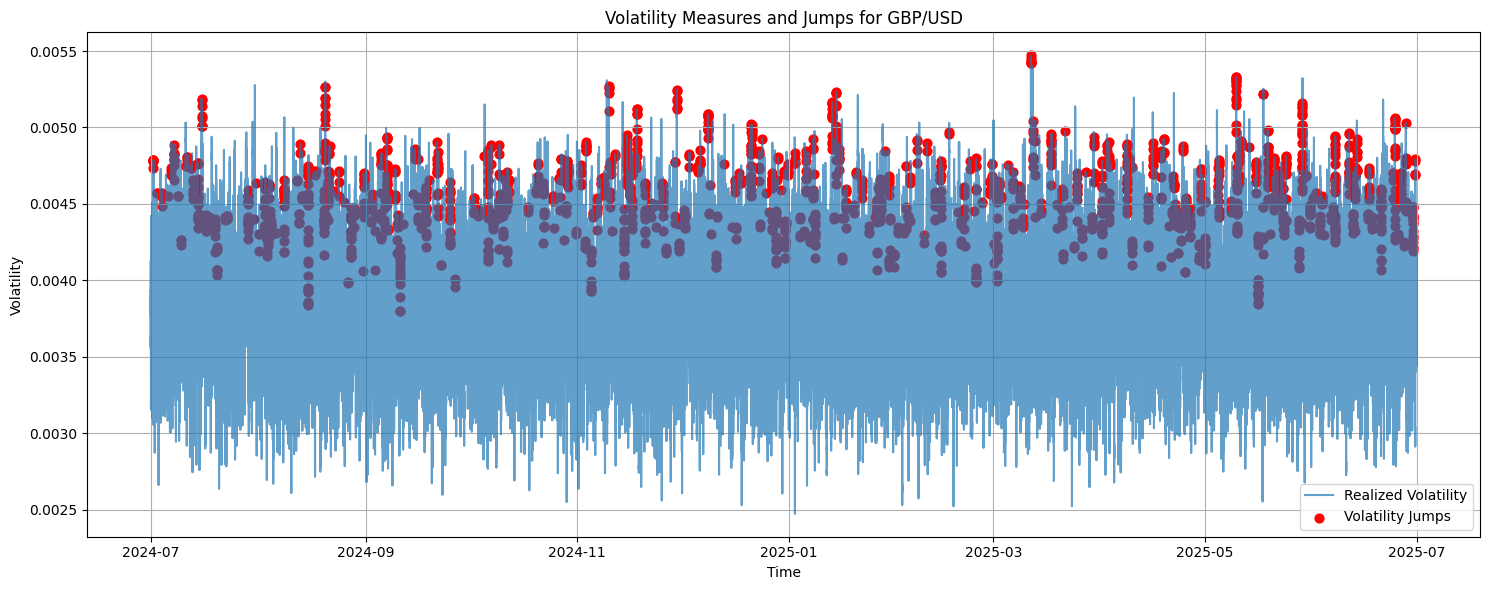

In [ ]:
plt.figure(figsize=(15, 6))
plt.plot(realized_vol_1min_pair.index, realized_vol_1min_pair, label="Realized Volatility", alpha=0.7)

# Mark jumps
plt.scatter(jump_dates_pair, realized_vol_1min_pair.loc[jump_dates_pair], color='red', label="Volatility Jumps", marker='o', s=40)

plt.title(f"Volatility Measures and Jumps for {selected_pair}")
plt.xlabel("Time")
plt.ylabel("Volatility")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
data_1min_pair = data_1min[selected_pair]
data_1min_pair

,EUR/USD
timestamp,
2024-07-01 00:00:00,0.874054
2024-07-01 00:01:00,0.874193
2024-07-01 00:02:00,0.874315
2024-07-01 00:03:00,0.874757
2024-07-01 00:04:00,0.874503
...,...
2025-06-30 23:56:00,0.634890
2025-06-30 23:57:00,0.635144
2025-06-30 23:58:00,0.635208


In [ ]:
df = pd.DataFrame({
    "mid_price": data_1min_pair,
    "historical_vol": historical_volatility_1min_pair,
    "ewma_vol": ewma_volatility_1min_pair,
    "realized_vol": realized_vol_1min_pair,
    "volatility_jump": vol_jump_flags_pair.astype(int)
})

In [ ]:
df.to_csv("Analysis_data_1min_GBP_USD.csv")

In [ ]:
realized_vol_1min_pair.head()

,GBP/USD
timestamp,
2024-07-01 00:00:00,NaN
2024-07-01 00:01:00,NaN
2024-07-01 00:02:00,NaN
2024-07-01 00:03:00,NaN
2024-07-01 00:04:00,NaN


In [ ]:
# Intraday Seasonality of the volatility
data_gbpusd = pd.DataFrame(realized_vol_1min_pair)

In [ ]:
data_gbpusd['timestamp'] = data_gbpusd.index
data_gbpusd['timeofday'] = data_gbpusd['timestamp'].dt.time

In [ ]:
data_gbpusd = data_gbpusd.dropna()

In [ ]:
data_gbpusd.rename(columns={'GBP/USD':'realized-vol'}, inplace=True)
data_gbpusd

,realized-vol,timestamp,timeofday
timestamp,,,
2024-07-01 01:00:00,0.003927,2024-07-01 01:00:00,01:00:00
2024-07-01 01:01:00,0.003933,2024-07-01 01:01:00,01:01:00
2024-07-01 01:02:00,0.003921,2024-07-01 01:02:00,01:02:00
2024-07-01 01:03:00,0.00394,2024-07-01 01:03:00,01:03:00
2024-07-01 01:04:00,0.003862,2024-07-01 01:04:00,01:04:00
...,...,...,...
2025-06-30 23:56:00,0.004241,2025-06-30 23:56:00,23:56:00
2025-06-30 23:57:00,0.004291,2025-06-30 23:57:00,23:57:00
2025-06-30 23:58:00,0.004249,2025-06-30 23:58:00,23:58:00


In [ ]:
# Group by time of day and compute average volatility across all days
intraday_volatility = data_gbpusd.groupby("timeofday")["realized-vol"].mean()

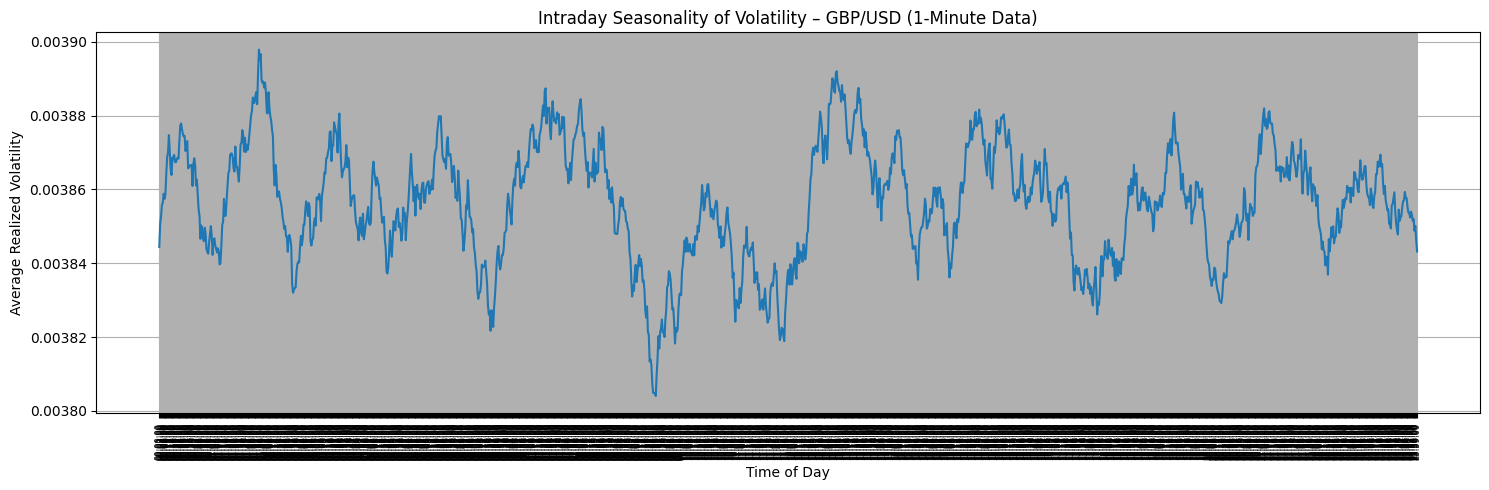

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(intraday_volatility.index.astype(str), intraday_volatility.values)
plt.title("Intraday Seasonality of Volatility – GBP/USD (1-Minute Data)")
plt.xlabel("Time of Day")
plt.ylabel("Average Realized Volatility")
plt.xticks(rotation=90, fontsize=6)
plt.grid(True)
plt.tight_layout()
plt.show()